### Librerias

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Rutas de Datos

In [2]:
ruta1='Datos/homicidios.xlsx'
ruta2='Datos/lesiones.xlsx'

### Analisis Exploratorio del dataset homicidios , apartado hechos

#### Transformacion y Limpieza de datos

In [145]:
homicidios_hechos=pd.read_excel(ruta1,sheet_name='HECHOS')
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [146]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Se observa que la columna "Dirección Normalizada" es producto de la union de las columnas "LUGAR_DEL_HECHO" , "Calle" , "Altura" y "Cruce", por lo tanto para evitar la redundancia de datos solo se trabajará con la columna "Dirección Normalizada" elminando las columnas mencionadas anteriormente.

La columna "PARTICIPANTES" tampoco es reelevante dado que se desgloza en las coluna "VICTIMA" Y "ACUSADO" por lo tanto podemos precidir de ella.

In [147]:
homicidios_hechos=homicidios_hechos.drop(['LUGAR_DEL_HECHO','Calle','Altura','Cruce','PARTICIPANTES'],axis=1)
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO,CARGAS


##### Valores Nulos

In [6]:
homicidios_hechos.isnull().sum()

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
TIPO_DE_CALLE            0
Dirección Normalizada    8
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
dtype: int64

Debido a la pequeña cantidad de datos nulos presentes en la columna "Dirección Normalizada" decidí eliminar aquellos registros que contengan nulos en algunos de sus campos.

In [7]:
homicidios_hechos=homicidios_hechos.dropna(subset='Dirección Normalizada').reset_index(drop=True)
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
684,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
685,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
686,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


##### Duplicados

In [8]:
homicidios_hechos[homicidios_hechos.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


Se obseva que no existen registros duplicados en el dataset

In [9]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     688 non-null    object        
 1   N_VICTIMAS             688 non-null    int64         
 2   FECHA                  688 non-null    datetime64[ns]
 3   AAAA                   688 non-null    int64         
 4   MM                     688 non-null    int64         
 5   DD                     688 non-null    int64         
 6   HORA                   688 non-null    object        
 7   HH                     688 non-null    object        
 8   TIPO_DE_CALLE          688 non-null    object        
 9   Dirección Normalizada  688 non-null    object        
 10  COMUNA                 688 non-null    int64         
 11  XY (CABA)              688 non-null    object        
 12  pos x                  688 non-null    object        
 13  pos y

In [10]:
homicidios_hechos['HH'].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 21,
       20, 14, 3, 2, 13, 'SD'], dtype=object)

In [11]:
homicidios_hechos['HH'].value_counts()

HH
7     41
6     39
5     35
9     35
14    33
12    32
10    31
18    31
8     31
16    30
19    30
17    30
21    29
22    29
23    28
11    26
15    25
3     25
1     24
20    24
4     23
0     22
2     17
13    17
SD     1
Name: count, dtype: int64

Se observa que la columna 'HH' contiene un valor SD el cual indica que no hay datos, para el fin de desarrollar un buen analisis se procederá a eliminar este registro 

In [12]:
homicidios_hechos=homicidios_hechos[homicidios_hechos['HH']!='SD']
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
684,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
685,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
686,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [13]:
homicidios_hechos['HH']=homicidios_hechos['HH'].astype('int')
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 687
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     687 non-null    object        
 1   N_VICTIMAS             687 non-null    int64         
 2   FECHA                  687 non-null    datetime64[ns]
 3   AAAA                   687 non-null    int64         
 4   MM                     687 non-null    int64         
 5   DD                     687 non-null    int64         
 6   HORA                   687 non-null    object        
 7   HH                     687 non-null    int32         
 8   TIPO_DE_CALLE          687 non-null    object        
 9   Dirección Normalizada  687 non-null    object        
 10  COMUNA                 687 non-null    int64         
 11  XY (CABA)              687 non-null    object        
 12  pos x                  687 non-null    object        
 13  pos y     

C:\Users\pablo\AppData\Local\Temp\ipykernel_20984\1137899118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_hechos['HH']=homicidios_hechos['HH'].astype('int')


In [14]:
homicidios_hechos.describe() # solo aplica a variables cuantitativas 
# No hay observacionse reelevantes

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA
count,687.000000,687,687.000000,687.000000,687.000000,687.000000,687.000000
mean,1.029112,2018-09-16 06:36:09.432314368,2018.193595,6.695779,15.928675,11.660844,7.411936
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,6.000000,4.000000
50%,1.000000,2018-07-15 00:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000
75%,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,17.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000
std,0.176695,NaN,1.682205,3.574574,8.635096,6.685127,4.380653


In [15]:
# Cambiar el tipo de dato de las columnas "pos x" y "pos y", crear funcion 
def cambiar_tipo_coordenadas(coordenadas):
    try:
        return float(coordenadas)

    except:
        return None
    


In [16]:
homicidios_hechos['pos x']=homicidios_hechos['pos x'].apply(cambiar_tipo_coordenadas)
homicidios_hechos['pos y']=homicidios_hechos['pos y'].apply(cambiar_tipo_coordenadas)

C:\Users\pablo\AppData\Local\Temp\ipykernel_20984\685814727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_hechos['pos x']=homicidios_hechos['pos x'].apply(cambiar_tipo_coordenadas)
C:\Users\pablo\AppData\Local\Temp\ipykernel_20984\685814727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_hechos['pos y']=homicidios_hechos['pos y'].apply(cambiar_tipo_coordenadas)


In [17]:
# Eliminar nulos generados producto de la transformacion anterior 
homicidios_hechos=homicidios_hechos.dropna().reset_index(drop=True)
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
679,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
680,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
681,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


#### Analisis exploratorio

Encontrar relaciones entre variables, ver distribucion de datos y demas 

In [18]:
homicidios_hechos.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


In [19]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     683 non-null    object        
 1   N_VICTIMAS             683 non-null    int64         
 2   FECHA                  683 non-null    datetime64[ns]
 3   AAAA                   683 non-null    int64         
 4   MM                     683 non-null    int64         
 5   DD                     683 non-null    int64         
 6   HORA                   683 non-null    object        
 7   HH                     683 non-null    int32         
 8   TIPO_DE_CALLE          683 non-null    object        
 9   Dirección Normalizada  683 non-null    object        
 10  COMUNA                 683 non-null    int64         
 11  XY (CABA)              683 non-null    object        
 12  pos x                  683 non-null    float64       
 13  pos y

In [52]:
homicidios_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA,pos x,pos y
count,683.000000,683,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.029283,2018-09-17 08:32:19.677891584,2018.197657,6.682284,15.938507,11.654466,7.415813,-58.441428,-34.619668
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250
25%,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,6.000000,4.000000,-58.476178,-34.643745
50%,1.000000,2018-07-16 00:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622973
75%,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,17.000000,11.000000,-58.401841,-34.596991
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654
std,0.177199,NaN,1.682372,3.572881,8.627296,6.669013,4.374665,0.046075,0.035302


<Axes: xlabel='HH', ylabel='Count'>

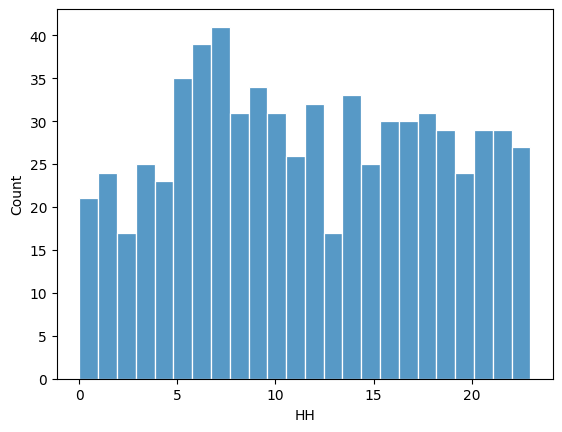

In [143]:
# Ver la distribucion de horas, para observar qeu horarios son los que tienen mas accidentes 
intervalos=homicidios_hechos['HH'].nunique()
horas=sns.histplot(x=homicidios_hechos['HH'],bins=intervalos,element='bars',stat='count',edgecolor='white',linewidth=0.9)
horas

# Observaciones, para saber con exactitud que hora fue la de mayor cantidad de accidentes necesitaria qeu en cada intervalo figure el valor de la hora o intevalo de horas, para hacer esto
# en seaborn es necesario hacerlo mediante un bucle for, lo cual no me parece muy eficiente 

In [148]:
homicidios_hechos.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO,PASAJEROS


In [150]:
# Cantida de vehiculos unicos
homicidios_hechos['VICTIMA'].nunique()

10

C:\Users\pablo\AppData\Local\Temp\ipykernel_20984\2169961034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=homicidios_hechos['VICTIMA'],palette='viridis')
C:\Users\pablo\AppData\Local\Temp\ipykernel_20984\2169961034.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')


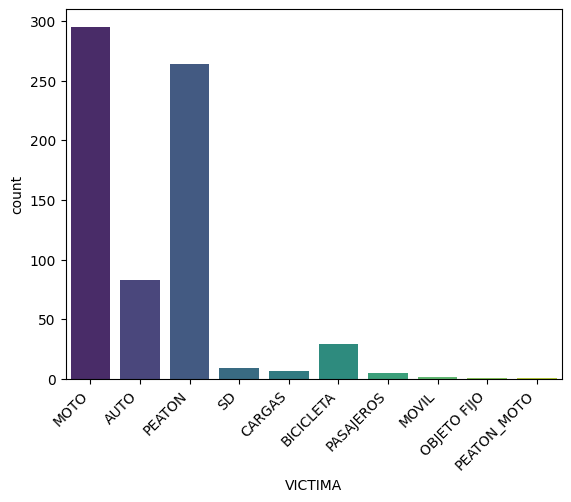

In [156]:
# Ver la distribucion de la variable categorica "VICTIMA"
# Jugar mas con countplot

ax=sns.countplot(x=homicidios_hechos['VICTIMA'],palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()


#### SECCION DE ESTUDIO DE LIBRERIAS

<Axes: ylabel='Count'>

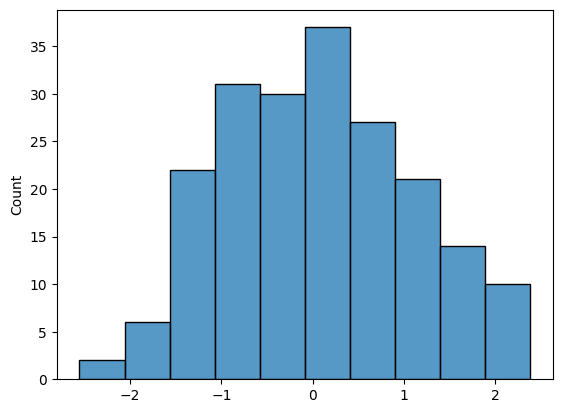

In [89]:
# jugar con histograma 
rng=np.random.RandomState(0)  # objeto constructor de numeros aleatorios a partir de una semilla  
# x=rng.normal(0,1,size=100)
x=rng.normal(0,1,size=200)  # .rand o .random son metodos para genera nros aleatorios entre 0 y 1 con distribucion normal unifirome 
sns.histplot(x=x)

In [65]:
rng=np.random.default_rng()
rng.random(5)

array([0.5565937 , 0.97270699, 0.79401779, 0.85250496, 0.23135496])

In [80]:
np.random.rand(2,2,5,3)

array([[[[0.85130438, 0.54811804, 0.12554124],
         [0.17660761, 0.26887445, 0.04588015],
         [0.17785996, 0.54825318, 0.63242646],
         [0.01438461, 0.34834733, 0.53908361],
         [0.20348756, 0.94898796, 0.33055981]],

        [[0.16858934, 0.90440666, 0.10350415],
         [0.92678126, 0.12098726, 0.00296577],
         [0.29434114, 0.32269668, 0.24805466],
         [0.9954969 , 0.54698873, 0.39858809],
         [0.08747186, 0.88618626, 0.75091389]]],


       [[[0.83721854, 0.63857508, 0.56853482],
         [0.41767494, 0.44341755, 0.0619042 ],
         [0.70864091, 0.42702708, 0.84055807],
         [0.05381257, 0.0280868 , 0.98603535],
         [0.20209024, 0.53832801, 0.46999835]],

        [[0.3314153 , 0.70355226, 0.28589238],
         [0.58795059, 0.85392946, 0.64406583],
         [0.92151975, 0.20508683, 0.1652978 ],
         [0.52987934, 0.43388756, 0.73376702],
         [0.1219497 , 0.42740407, 0.90140094]]]])

In [ ]:
# JUGAR CON SCATERPLOTT

In [ ]:
# JUGAR CON COUNTPLOT para variables cualitativas

In [20]:

# Plantearme preguntas del tipo "existe relacione entre la variable A y B? y luego analizar con graficos"
# Historgrama de frecuencias de variables cualitativas 
# Exportar dataframe a mysql para ser consumidos luegos por POWER BI

### Analisis Exploratorio del dataset homicidios , apartado victimas

##### Transformacion y Limpieza de datos 

In [21]:
homicidios_victimas=pd.read_excel(ruta1,sheet_name='VICTIMAS')
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [22]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [23]:
# Observaciones
    # columna "EDAD" en formato incorrecto, explorarla detenidamente por que no la toma como int
    # columna "FECHA_FALLECIMIENTO" en formato incorrecto, ver cuantos valores SD tiene la columna 

In [24]:
# Explorar columna "EDAD"
homicidios_victimas['EDAD'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'SD', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

Para poder hacer analisis relacionados con la EDAD de las victimas, elimino aquellos registros que no contengan datos en la EDAD de las victimas 

In [25]:
homicidios_victimas=homicidios_victimas[homicidios_victimas['EDAD']!='SD'].reset_index(drop=True)
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
659,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
660,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
661,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
662,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [26]:
# Explorar columna "FECHA_FALLECIMIENTO"
homicidios_victimas[homicidios_victimas['FECHA_FALLECIMIENTO']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
16,2016-0022,2016-02-21,2016,2,21,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,SD
19,2016-0027,2016-02-28,2016,2,28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,SD
22,2016-0031,2016-03-08,2016,3,8,CONDUCTOR,MOTO,MASCULINO,21,SD
41,2016-0064,2016-05-14,2016,5,14,PEATON,PEATON,MASCULINO,20,SD
43,2016-0067,2016-05-21,2016,5,21,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,30,SD
44,2016-0068,2016-05-22,2016,5,22,CONDUCTOR,MOTO,MASCULINO,58,SD
46,2016-0073,2016-06-11,2016,6,11,CONDUCTOR,MOTO,MASCULINO,23,SD
47,2016-0074,2016-06-12,2016,6,12,CONDUCTOR,AUTO,MASCULINO,60,SD
50,2016-0078,2016-06-13,2016,6,13,CONDUCTOR,MOTO,MASCULINO,30,SD


Dado que la cantidad significativa  de registros que no poseen datos acerca de la fecha de fallecimiento de las victimas, decido no eliminar estos registros, con el objetivo de evitar la perdidad de datos reelevantes.

In [27]:
# Ver cuantos registros  estan sin datos en la columna "EDAD"
homicidios_victimas[homicidios_victimas['EDAD']=='SD'].count()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [28]:
# Valores nulos 
homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [29]:
# Registros duplicados 
homicidios_victimas[homicidios_victimas.duplicated()] # sin registros duplicados

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


##### Analisis Exploratorio

### Analisis Exploratorio del dataset lesiones , apartado hechos

In [30]:
lesiones_hechos=pd.read_excel(ruta2,sheet_name='HECHOS')
lesiones_hechos

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


#### Transformación y Limpieza de datos

In [31]:
lesiones_hechos.iloc[:,7:]

,franja_hora,direccion_normalizada,comuna,tipo_calle,otra_direccion,calle,altura,cruce,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,9,SD,14,SD,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",NaN,NaN,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,1,SD,8,SD,"Autopista Presidente Héctor J. Cámpora y Roca,...",NaN,NaN,NaN,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,2,SD,8,SD,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",NaN,NaN,NaN,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,2,SD,7,SD,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",NaN,NaN,NaN,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,4,SD,3,SD,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",NaN,NaN,NaN,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",0.0,GUAMINI,Point (95400.5441905024 96621.6007711877),-58.513477158887,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",4436.0,NaN,Point (97705.4491469278 98614.8825470092),-58.488326609395,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,20,SD,1,SD,Barrio Padre Carlos Mugica (Villa 31 bis),NaN,NaN,NaN,Point (107377.10694920316745993 105120.7873965...,-58.382894,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,22,LINIERS VIRREY y MORENO,5,CALLE,SD,LINIERS VIRREY,0.0,MORENO,Point (104472.702045632 101660.930364258),-58.414532050899,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [32]:
lesiones_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [33]:
# Observaciones 
    # columna "franja_hora" tipo incorrecto 
    # columna "comuna" tipo incorrecto 
    # columna "longitud" y "latitud" tipo incorrecto

##### Valores duplicados

In [34]:
lesiones_hechos[lesiones_hechos.duplicated()] # Sin registros duplicados

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


##### Valores Nulos

In [35]:
# Registros Nulos 
lesiones_hechos[lesiones_hechos.isna().all(axis=1)] # no existen registros nulos 

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


In [36]:
lesiones_hechos.isnull().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  5
direccion_normalizada       53
comuna                     169
tipo_calle                   0
otra_direccion               0
calle                    10918
altura                   11014
cruce                    14378
geocodificacion_CABA        39
longitud                   262
latutid                    262
victima                      0
acusado                      0
participantes                0
moto                        93
auto                        93
transporte_publico          93
camion                      93
ciclista                    93
gravedad                     0
dtype: int64

In [37]:
# Valores nulos - columna ID completa 
# Columnas tipo fecha
# Columna tipo numericas
# Registros duplicados 
# Revizar outliers en columnas : n_victimas 
# Histograma de frecuencias de variables cualitativas 


# Que es SD ? significa sin datos ? 

In [38]:
# Leer sobre EDA y matriz de correlación 

#### Analisis Exploratorio

### Analisis Exploratorio del dataset lesiones , apartado victimas

In [39]:
lesiones_victimas=pd.read_excel(ruta2,sheet_name='VICTIMAS')
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


##### Transformación y Limpieza de Datos

In [40]:
lesiones_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID hecho          27605 non-null  object        
 1   AAA               27605 non-null  int64         
 2   MM                27605 non-null  int64         
 3   DD                27605 non-null  int64         
 4   FECHA             27605 non-null  datetime64[ns]
 5   VEHICULO_VICTIMA  27605 non-null  object        
 6   SEXO              27605 non-null  object        
 7   EDAD_VICTIMA      27605 non-null  object        
 8   GRAVEDAD          27605 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [41]:
lesiones_victimas.isnull().sum()

ID hecho            0
AAA                 0
MM                  0
DD                  0
FECHA               0
VEHICULO_VICTIMA    0
SEXO                0
EDAD_VICTIMA        0
GRAVEDAD            0
dtype: int64

In [42]:
# OBSERVACIONES 
    # columna "EDAD_VICTIMA" tipo incorrecto 

In [43]:
# Explorar columna "EDAD"
lesiones_victimas['EDAD_VICTIMA'].unique()

array([57, 'SD', 45, 27, 32, 21, 37, 33, 25, 23, 42, 53, 1, 62, 67, 75,
       40, 48, 3, 49, '25', 34, 52, 44, 28, 59, 50, 73, '26', 51, 16, 43,
       38, 64, 36, 84, 22, 26, '32', 20, 5, 39, 56, 69, 55, 46, 29, 41,
       54, 74, 70, 6, 30, 12, 83, 24, 35, 68, 15, 31, 19, '30', 9, 2, 13,
       18, 17, 58, 60, 47, '20', 7, 63, 66, 80, 65, 71, 79, 85, 61, 77,
       90, '43', '58', '45', 76, '54', '55', 89, '74', '19', 78, 91, 97,
       10, 72, 88, 11, 81, '31', 8, 14, '50', '21', 96, '27', '34', '40',
       '28', '59', '39', 82, 87, 86, '38', '37', 'sd', '44', '29', '35',
       '42', '18', 4, '23', '41', 92, '46', '72', '36', '24', '87', '16',
       '14', '33', '61', '12', '49', '62', '90', '22', '60', '64', '56',
       '78', '65', '51', '53', '66', '71', '76', '47', '52', '48', '13',
       '63', '68', '15', '57', '70', '73', '80', '67', '5', '84', '94',
       '86', '3', '69', '6', '17', '91', '7', '8', '82', '75', '85', '77',
       '4', '81', '83', '2', '11', '88', '9', '79

In [44]:
# Ver cuantos valores "SD" existen
lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']=='SD']



,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
10,LC-2019-0000179,2019,1,1,2019-01-01,sd,SD,SD,SD
14,LC-2019-0000347,2019,1,1,2019-01-01,sd,Varon,SD,SD
21,LC-2019-0000647,2019,1,1,2019-01-01,sd,Varon,SD,SD
...,...,...,...,...,...,...,...,...,...
27578,LC-2021-0000449,2021,1,1,2021-01-01,SD,SD,SD,SD
27589,LC-2021-0078012,2021,2,21,2021-02-21,SD,SD,SD,SD
27595,LC-2021-0230174,2021,5,26,2021-05-26,SD,SD,SD,SD
27596,LC-2021-0305042,2021,6,28,2021-06-28,AUTO,SD,SD,SD


Para llevar a cabo un analisis mas limpio decido solo trabajar con aquellos registros donde el valor en la columna "EDAD_VICTIMA" sea del tipo numerico, por lo tanto se eliminan todos los datos de la columna cuyo valor sea "SD"

In [45]:
lesiones_victimas=lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']!='SD']
lesiones_victimas=lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']!='sd']
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
5,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,27,SD
6,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,32,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


In [46]:
# Cambiar a tipo entero la columna "EDAD_VICTIMA"
lesiones_victimas['EDAD_VICTIMA']=lesiones_victimas['EDAD_VICTIMA'].astype(int)

In [47]:
#Estadisticas de variables cuantitativas
lesiones_victimas.describe()

,AAA,MM,DD,FECHA,EDAD_VICTIMA
count,23134.000000,23134.000000,23134.000000,23134,23134.000000
mean,2019.925780,6.741333,15.657085,2020-06-10 22:57:00.420160768,37.727241
min,2019.000000,1.000000,1.000000,2019-01-01 00:00:00,0.000000
25%,2019.000000,4.000000,8.000000,2019-07-31 00:00:00,27.000000
50%,2020.000000,7.000000,16.000000,2020-05-14 00:00:00,35.000000
75%,2021.000000,10.000000,23.000000,2021-04-16 00:00:00,46.000000
max,2021.000000,12.000000,31.000000,2021-12-31 00:00:00,100.000000
std,0.863221,3.483503,8.654921,NaN,15.216933


In [48]:
lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']==0]

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
17055,LC-2020-0682924,2020,12,30,2020-12-30,SD,Mujer,0,sd
19134,LC-2021-0632881,2021,12,20,2021-12-20,SD,Varon,0,SD


De lo observado decido eliminar aquellos registros cuya edad de las victimas sea igual a cero

In [49]:
lesiones_victimas=lesiones_victimas[lesiones_victimas['EDAD_VICTIMA']!=0].reset_index(drop=True)
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
2,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,27,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,32,SD
...,...,...,...,...,...,...,...,...,...
23127,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
23128,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
23129,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
23130,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


##### Análisis Exploratorio

In [50]:
lesiones_victimas.describe()

,AAA,MM,DD,FECHA,EDAD_VICTIMA
count,23132.000000,23132.000000,23132.000000,23132,23132.000000
mean,2019.925731,6.740878,15.656277,2020-06-10 22:09:45.163409920,37.730503
min,2019.000000,1.000000,1.000000,2019-01-01 00:00:00,1.000000
25%,2019.000000,4.000000,8.000000,2019-07-31 00:00:00,27.000000
50%,2020.000000,7.000000,16.000000,2020-05-14 00:00:00,35.000000
75%,2021.000000,10.000000,23.000000,2021-04-16 00:00:00,46.000000
max,2021.000000,12.000000,31.000000,2021-12-31 00:00:00,100.000000
std,0.863229,3.483310,8.654734,NaN,15.213546


In [51]:
# Ver como se distribuyen las EDADES a travez de un diagrama de dispersion o histograma o un grafico de caja